In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
customers_url = 'https://drive.google.com/uc?id=1bu_--mo79VdUG9oin4ybfFGRUSXAe-WE'
products_url = 'https://drive.google.com/uc?id=1IKuDizVapw-hyktwfpoAoaGtHtTNHfd0'
transactions_url = 'https://drive.google.com/uc?id=1saEqdbBB-vuk2hxoAf4TzDEsykdKlzbF'

customers = pd.read_csv(customers_url)
products = pd.read_csv(products_url)
transactions = pd.read_csv(transactions_url)

In [3]:
# Task 1: Exploratory Data Analysis (EDA)
def perform_eda():
    print("### Customers Dataset")
    print(customers.info())
    print(customers.describe())
    print(customers.head())

    print("\n### Products Dataset")
    print(products.info())
    print(products.describe())
    print(products.head())

    print("\n### Transactions Dataset")
    print(transactions.info())
    print(transactions.describe())
    print(transactions.head())

In [4]:
# Merging datasets for joint analysis
merged_data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')


In [5]:
# Top regions by sales
region_sales = merged_data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
print("\nTop regions by sales:")
print(region_sales)


Top regions by sales:
Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64


In [6]:
# Popular product categories
popular_categories = merged_data.groupby('Category')['Quantity'].sum().sort_values(ascending=False)
print("\nMost popular product categories:")
print(popular_categories)


Most popular product categories:
Category
Books          681
Home Decor     639
Electronics    627
Clothing       590
Name: Quantity, dtype: int64


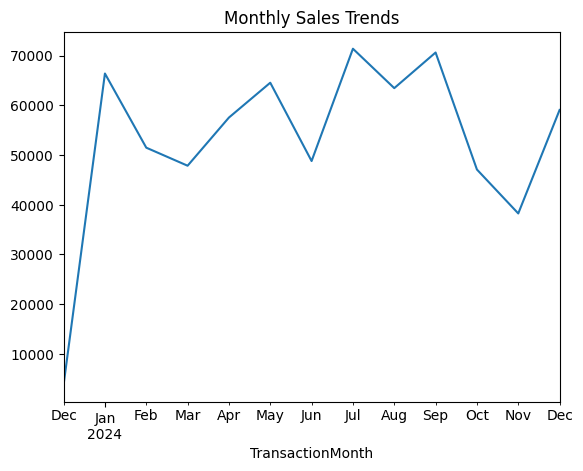

In [7]:
# Monthly sales trends
merged_data['TransactionMonth'] = pd.to_datetime(merged_data['TransactionDate']).dt.to_period('M')
monthly_sales = merged_data.groupby('TransactionMonth')['TotalValue'].sum()
monthly_sales.plot(title="Monthly Sales Trends", kind='line')
plt.show()

In [8]:
perform_eda()

### Customers Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2022-04-16
freq            1                 1             59           3
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen